In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\abhishek ambawale\\Downloads\\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

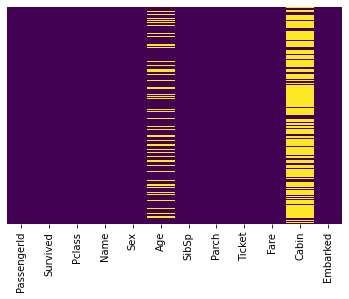

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# Data Cleaning

Few conclusions

1. Missing values in Age, Cabin and Embarked columns
2. More than 70 percent values are missing in cabin columns, will have to drop
3. Few columns have inappropriate data types

In [6]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [7]:
# Imputing missing values in age with mean of age.

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# S it is

df['Embarked'].fillna('S', inplace=True)

#### Changing data type for the following columns.

Survived(category)
PClass(category)
Sex(category)
Age(int)
Embarked(category)

In [10]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


# EDA

Out of 891 62% people died in the accident


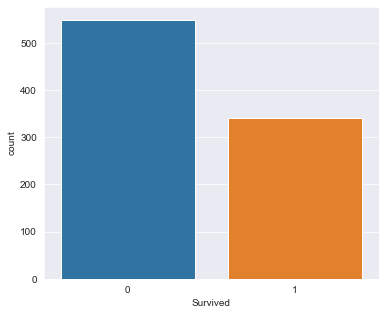

In [12]:
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df);
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {}% people died in the accident".format(death_percent))

#### Survival based on male and female.

male      64.758698
female    35.241302
Name: Sex, dtype: float64


C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

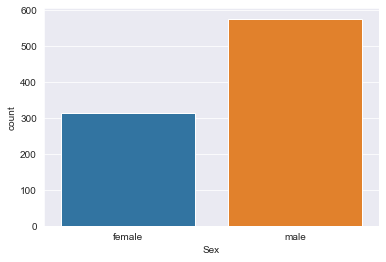

In [13]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

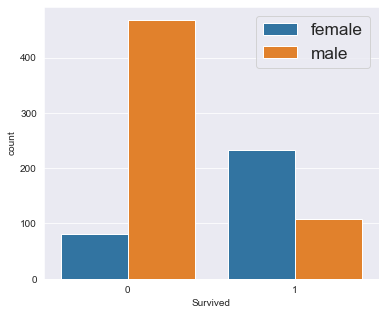

In [14]:
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.legend(fontsize='xx-large');

#### Survival based on Pclass.

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

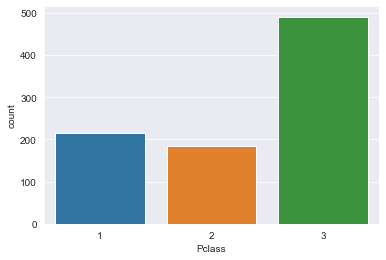

In [15]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass 3 was the most crowded class

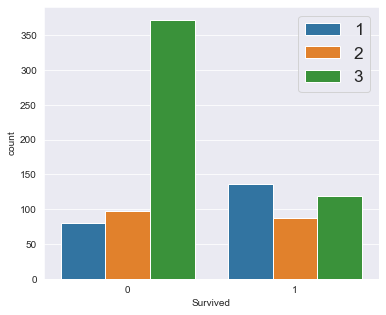

In [16]:
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.legend(fontsize='xx-large');

#### Countplot of family.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

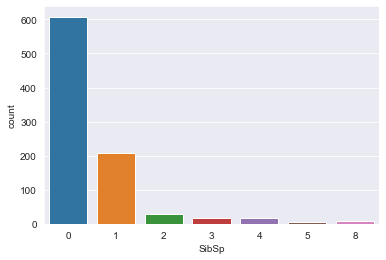

In [17]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

#### Survival based on Embarked.

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

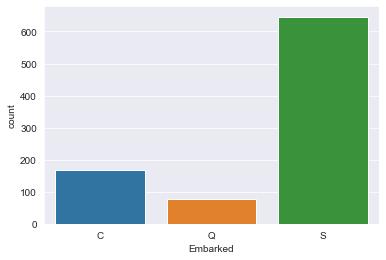

In [18]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


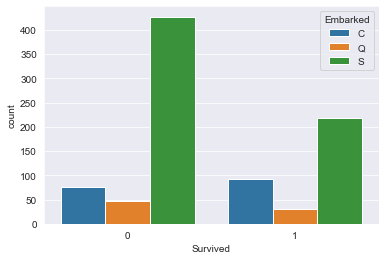

In [19]:
sns.countplot(df['Survived'], hue=df['Embarked'])

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


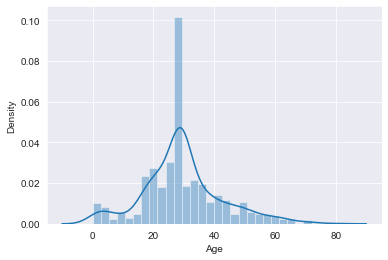

In [20]:
# Age column

sns.distplot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

In [21]:
embark =pd.get_dummies(df['Embarked'],drop_first=True)
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [22]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [23]:
df.drop(columns=['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7.2500
1,2,1,1,38,1,0,71.2833
2,3,1,3,26,0,0,7.9250
3,4,1,1,35,1,0,53.1000
4,5,0,3,35,0,0,8.0500


In [25]:
df = pd.concat([df,sex,embark],axis = 1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
x = df.drop('Survived',axis=1)
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22,1,0,7.2500,1,0,1
1,2,1,38,1,0,71.2833,0,0,0
2,3,3,26,0,0,7.9250,0,0,1
3,4,1,35,1,0,53.1000,0,0,1
4,5,3,35,0,0,8.0500,1,0,1


In [29]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 9)
(623,)
(268, 9)
(268,)


# Model Training and Predicting

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

C:\Users\abhishek ambawale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = lr.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
score = accuracy_score(y_pred,y_test)

In [37]:
score

0.7761194029850746

# Model Evaluation

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.75      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.77      0.78      0.77       268

